In [2]:
import SimpleITK as sitk
import tempfile
import os
import random
from random import randint
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageEnhance

In [3]:
umin=137
umax=52578

In [5]:

def read_raw(
    binary_file_name,
    image_size,
    sitk_pixel_type = sitk.sitkUInt16,
    image_spacing=None,
    image_origin=None,
    big_endian=False,
):
    """
    Read a raw binary scalar image.

    Parameters
    ----------
    binary_file_name (str): Raw, binary image file content.
    image_size (tuple like): Size of image (e.g. [2048,2048])
    sitk_pixel_type (SimpleITK pixel type: Pixel type of data (e.g.
        sitk.sitkUInt16).
    image_spacing (tuple like): Optional image spacing, if none given assumed
        to be [1]*dim.
    image_origin (tuple like): Optional image origin, if none given assumed to
        be [0]*dim.
    big_endian (bool): Optional byte order indicator, if True big endian, else
        little endian.

    Returns
    -------
    SimpleITK image or None if fails.
    """

    pixel_dict = {
        sitk.sitkUInt8: "MET_UCHAR",
        sitk.sitkInt8: "MET_CHAR",
        sitk.sitkUInt16: "MET_USHORT",
        sitk.sitkInt16: "MET_SHORT",
        sitk.sitkUInt32: "MET_UINT",
        sitk.sitkInt32: "MET_INT",
        sitk.sitkUInt64: "MET_ULONG_LONG",
        sitk.sitkInt64: "MET_LONG_LONG",
        sitk.sitkFloat32: "MET_FLOAT",
        sitk.sitkFloat64: "MET_DOUBLE",
    }
    direction_cosine = [
        "1 0 0 1",
        "1 0 0 0 1 0 0 0 1",
        "1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1",
    ]
    dim = len(image_size)
    header = [
        "ObjectType = Image\n".encode(),
        (f"NDims = {dim}\n").encode(),
        ("DimSize = " + " ".join([str(v) for v in image_size]) + "\n").encode(),
        (
            "ElementSpacing = "
            + (
                " ".join([str(v) for v in image_spacing])
                if image_spacing
                else " ".join(["1"] * dim)
            )
            + "\n"
        ).encode(),
        (
            "Offset = "
            + (
                " ".join([str(v) for v in image_origin])
                if image_origin
                else " ".join(["0"] * dim) + "\n"
            )
        ).encode(),
        ("TransformMatrix = " + direction_cosine[dim - 2] + "\n").encode(),
        ("ElementType = " + pixel_dict[sitk_pixel_type] + "\n").encode(),
        "BinaryData = True\n".encode(),
        ("BinaryDataByteOrderMSB = " + str(big_endian) + "\n").encode(),
        # ElementDataFile must be the last entry in the header
        ("ElementDataFile = " + os.path.abspath(binary_file_name) + "\n").encode(),
    ]
    fp = tempfile.NamedTemporaryFile(suffix=".mhd", delete=False)

    # Not using the tempfile with a context manager and auto-delete
    # because on windows we can't open the file a second time for ReadImage.
    fp.writelines(header)
    fp.close()
    img = sitk.ReadImage(fp.name)
    os.remove(fp.name)
    return img




In [ ]:
folder = 1
files = os.listdir(f"../data/high_metal/acquisition_{folder}/")

for file in sorted(files)[:20]:
    if file.endswith(".raw"):
        path = f"../data/no_metal/acquisition_{folder}/{file}"
        print(path)
        im1 = read_raw(path, image_size = (400,400), big_endian = False)
        im2 = read_raw(path, image_size = (400,400), big_endian = True)
        im1 = (np.array(sitk.GetArrayFromImage(im1)) - umin)/(umax-umin)
        im2 = Image.fromarray( ((np.array(sitk.GetArrayFromImage(im2)) - umin)/(umax-umin) * 255).astype(np.uint8)  )
        enhancer = ImageEnhance.Brightness(im2)
        im2 = enhancer.enhance(3)
        fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
        ax1.imshow(im1, cmap='gray')
        ax2.imshow(im2, cmap='gray')
        plt.title(path)
        plt.show()



In [12]:
for name in ["high_metal", "no_metal", "low_metal"]:
    for folder in range(1,11):
        files = os.listdir(f"../data/{name}/acquisition_{folder}/")
        for file in sorted(files)[:19]:
            os.remove(f"../data/{name}/acquisition_{folder}/{file}")


In [ ]:
for name in ["high_metal", "no_metal", "low_metal"]:
    for folder in range(1,11):
        files = os.listdir(f"../data/{name}/acquisition_{folder}/")
        print(len(files))

../data/no_metal/acquisition_10/IE1705794_P406.i180870.raw


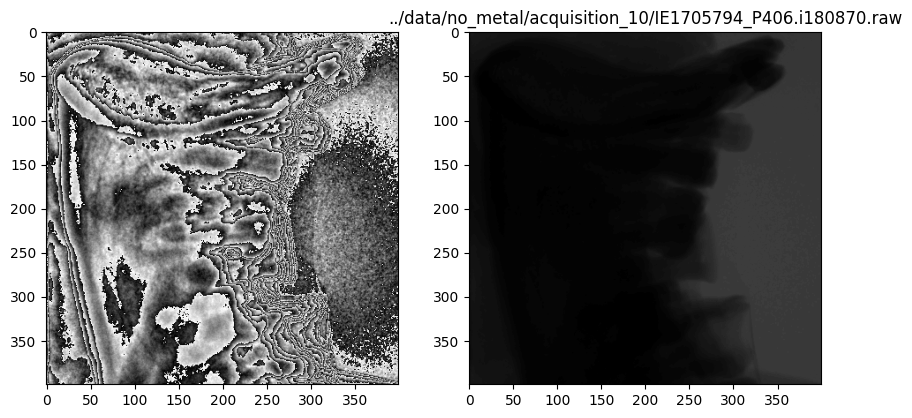

../data/no_metal/acquisition_10/IE1705794_P406.i180871.raw


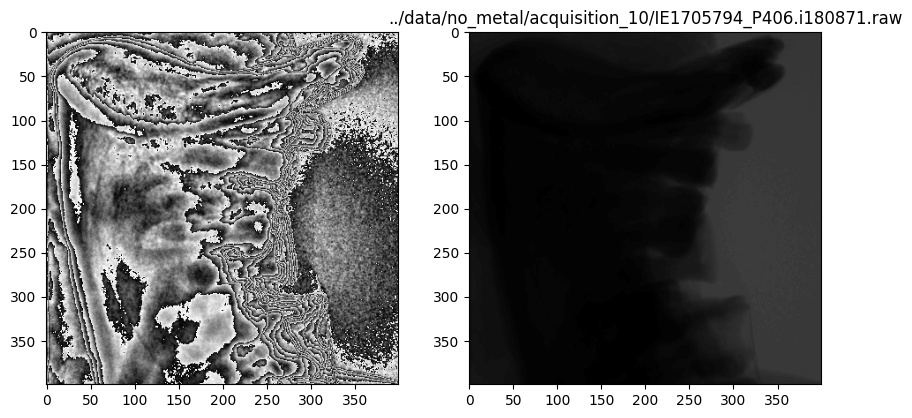

../data/no_metal/acquisition_10/IE1705794_P406.i180872.raw


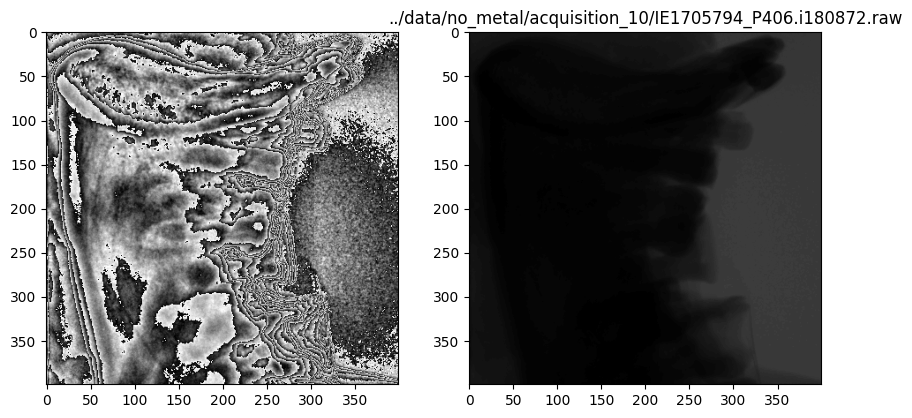

../data/no_metal/acquisition_10/IE1705794_P406.i180873.raw


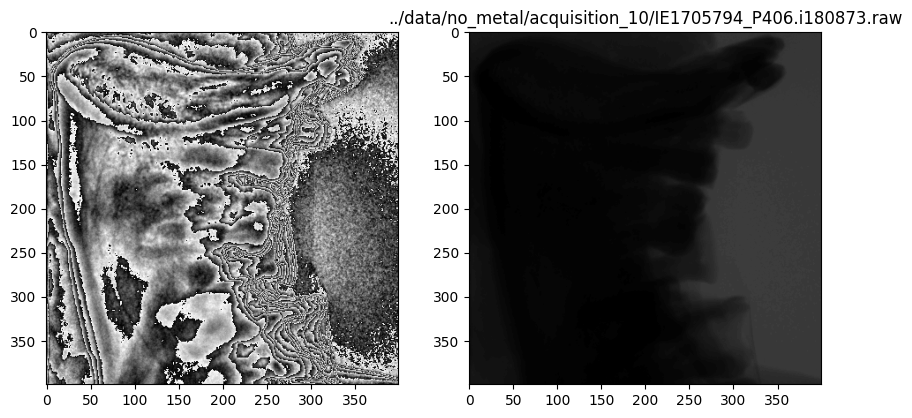

../data/no_metal/acquisition_10/IE1705794_P406.i180874.raw


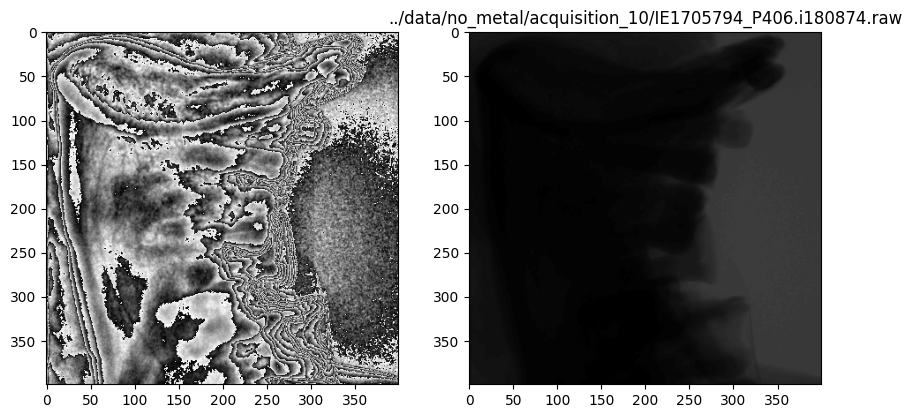

../data/no_metal/acquisition_10/IE1705794_P406.i180875.raw


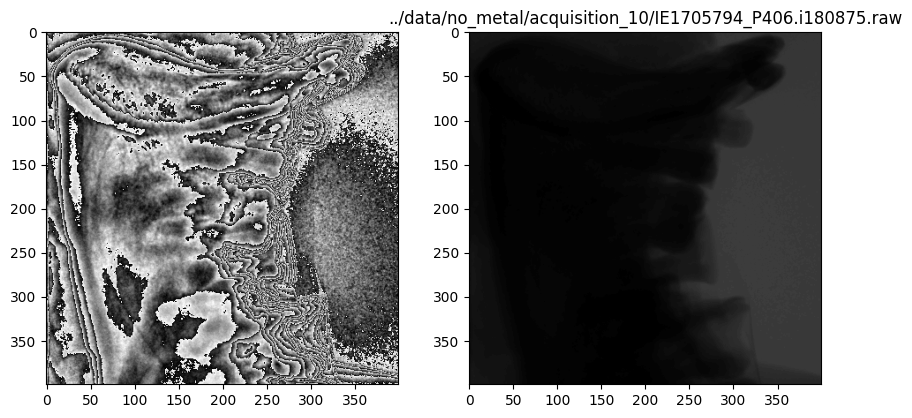

../data/no_metal/acquisition_10/IE1705794_P406.i180876.raw


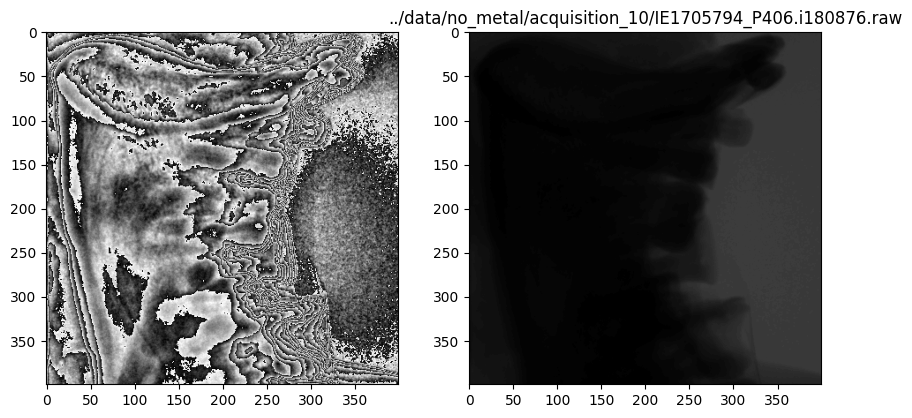

../data/no_metal/acquisition_10/IE1705794_P406.i180877.raw


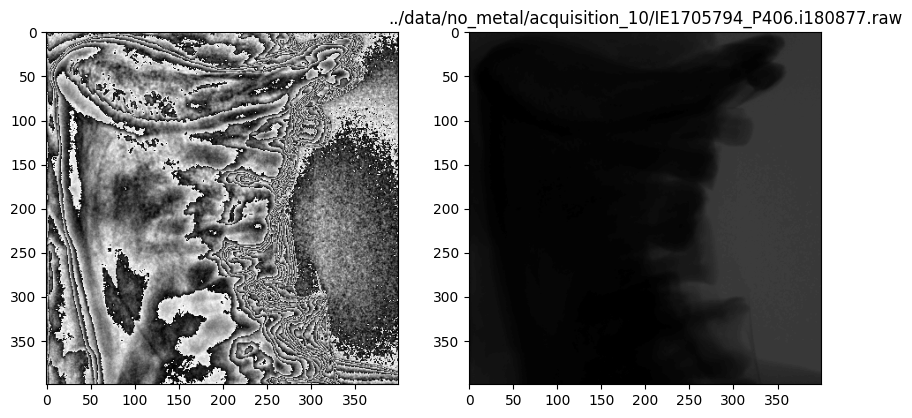

../data/no_metal/acquisition_10/IE1705794_P406.i180878.raw


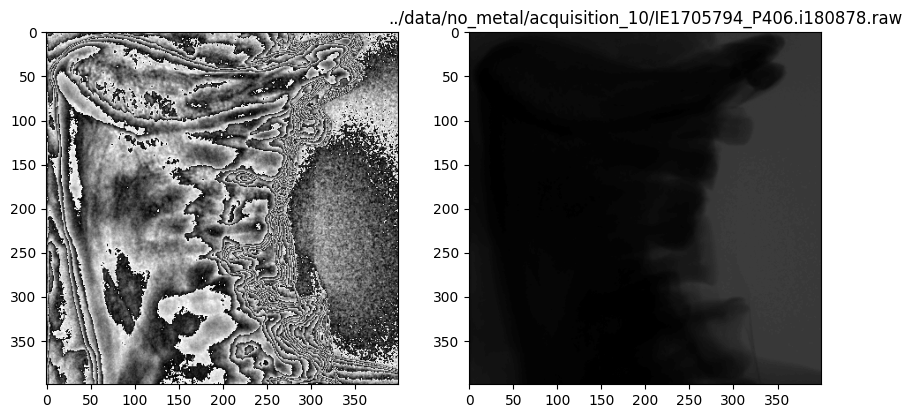

../data/no_metal/acquisition_10/IE1705794_P406.i180879.raw


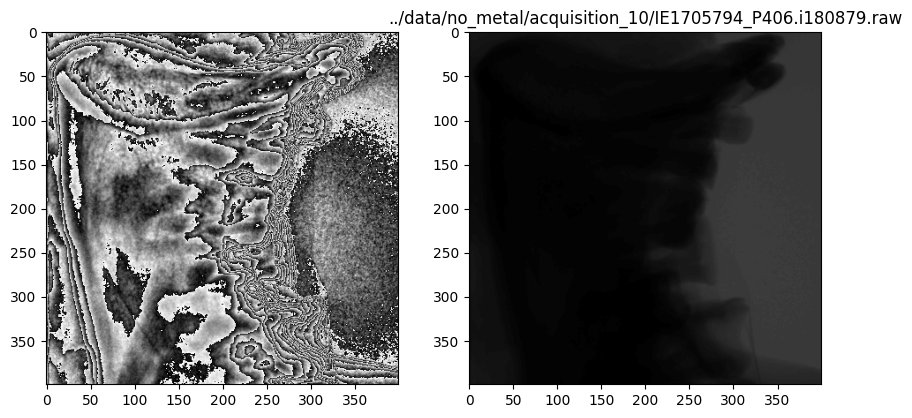

../data/no_metal/acquisition_10/IE1705794_P406.i180880.raw


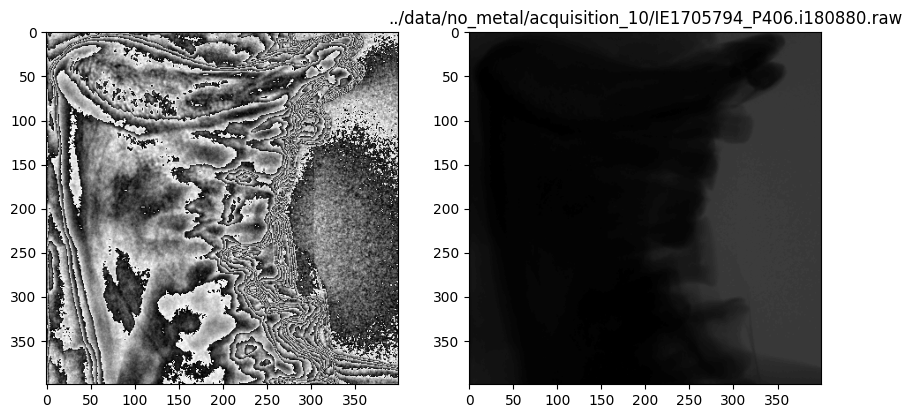

../data/no_metal/acquisition_10/IE1705794_P406.i180881.raw


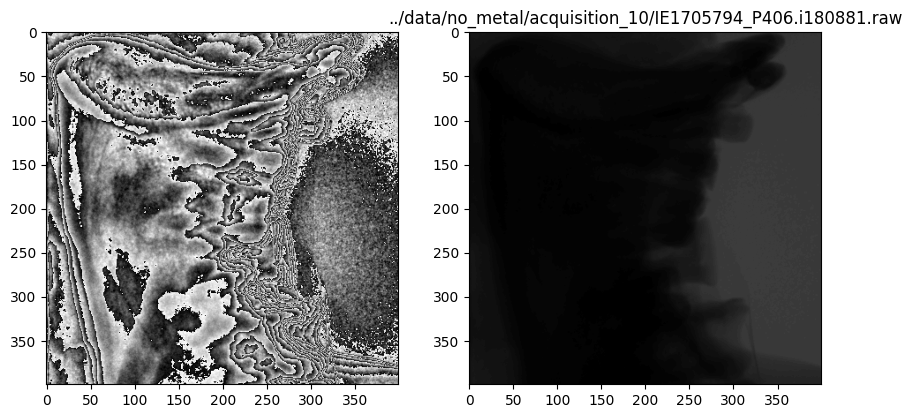

../data/no_metal/acquisition_10/IE1705794_P406.i180882.raw


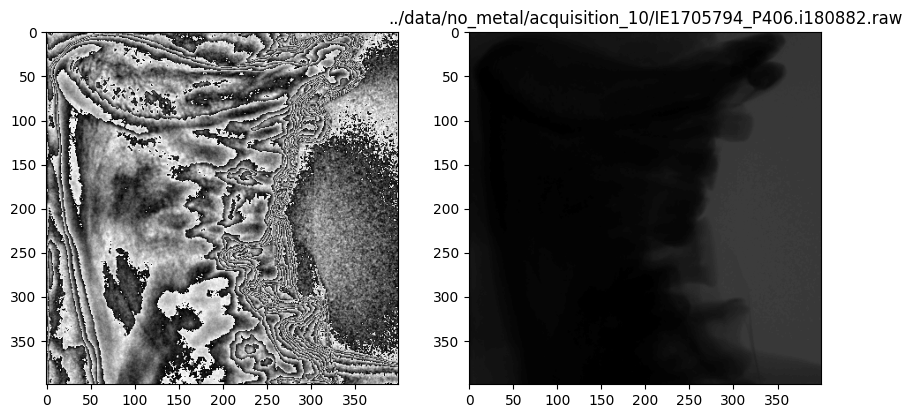

../data/no_metal/acquisition_10/IE1705794_P406.i180883.raw


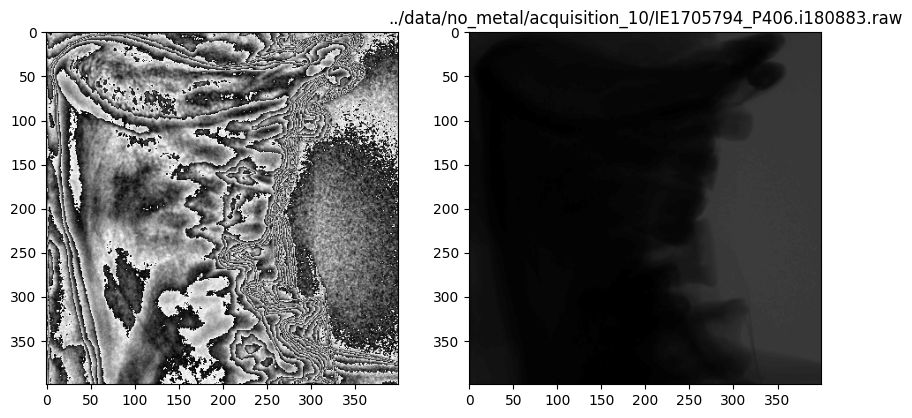

../data/no_metal/acquisition_10/IE1705794_P406.i180884.raw


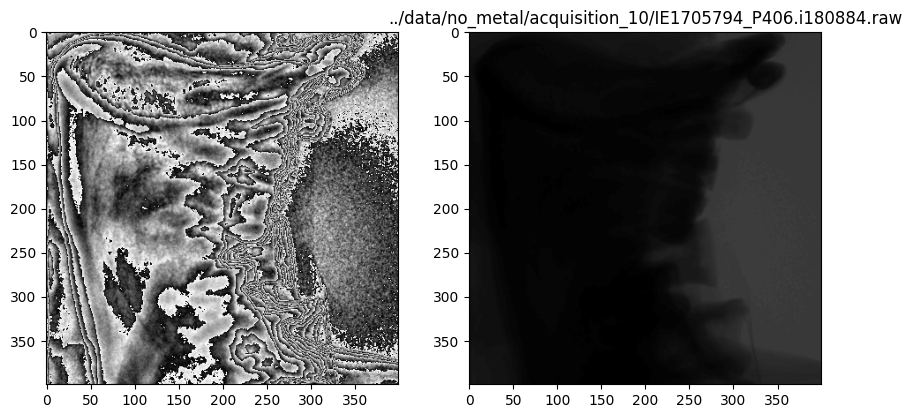

../data/no_metal/acquisition_10/IE1705794_P406.i180885.raw


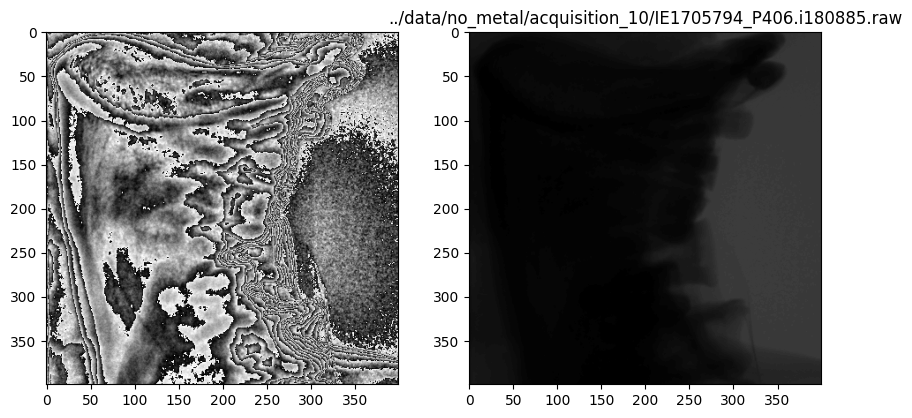

../data/no_metal/acquisition_10/IE1705794_P406.i180886.raw


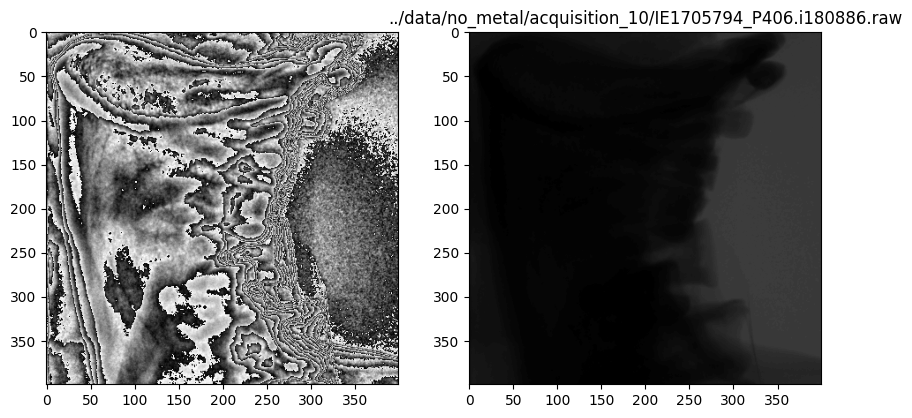

../data/no_metal/acquisition_10/IE1705794_P406.i180887.raw


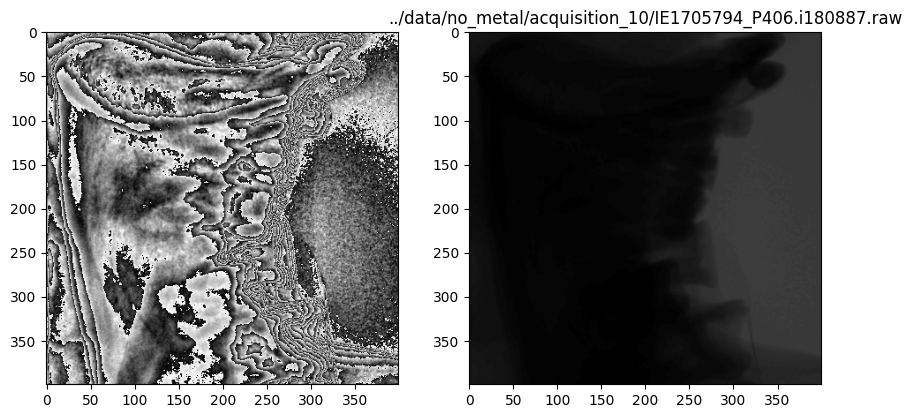

../data/no_metal/acquisition_10/IE1705794_P406.i180888.raw


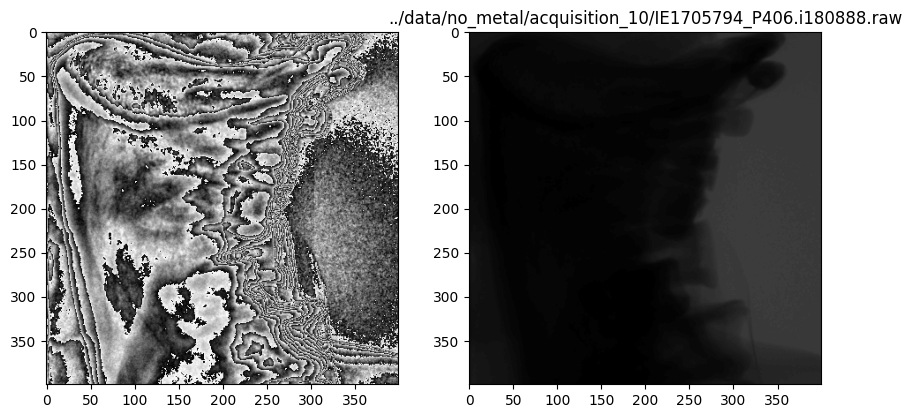

../data/no_metal/acquisition_10/IE1705794_P406.i180889.raw


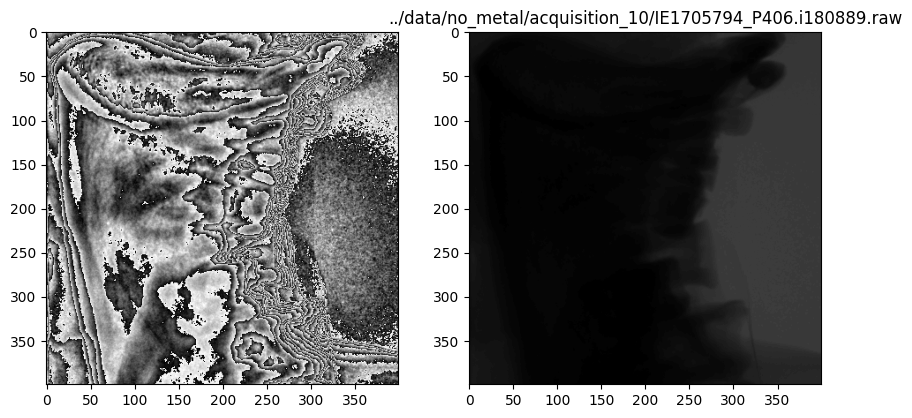

In [18]:

files = os.listdir(f"../data/high_metal/acquisition_{folder}/")

for file in sorted(files)[-20:]:
    if file.endswith(".raw"):
        path = f"../data/no_metal/acquisition_{folder}/{file}"
        print(path)
        im1 = read_raw(path, image_size = (400,400), big_endian = False)
        im2 = read_raw(path, image_size = (400,400), big_endian = True)
        im1 = (np.array(sitk.GetArrayFromImage(im1)) - umin)/(umax-umin)
        im2 = Image.fromarray( ((np.array(sitk.GetArrayFromImage(im2)) - umin)/(umax-umin) * 255).astype(np.uint8)  )
        enhancer = ImageEnhance.Brightness(im2)
        im2 = enhancer.enhance(3)
        fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))
        ax1.imshow(im1, cmap='gray')
        ax2.imshow(im2, cmap='gray')
        plt.title(path)
        plt.show()

aFor all acqusition always delete the first 19 as they only are black images